<a href="https://colab.research.google.com/github/glennamaria/Projects/blob/main/Fraud%20detection%20in%20e-commerce%20transactions%20problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path="/content/drive/MyDrive/Project.csv"
df= pd.read_csv(path)
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


In [4]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score,recall_score,roc_auc_score,accuracy_score,classification_report,confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore")

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


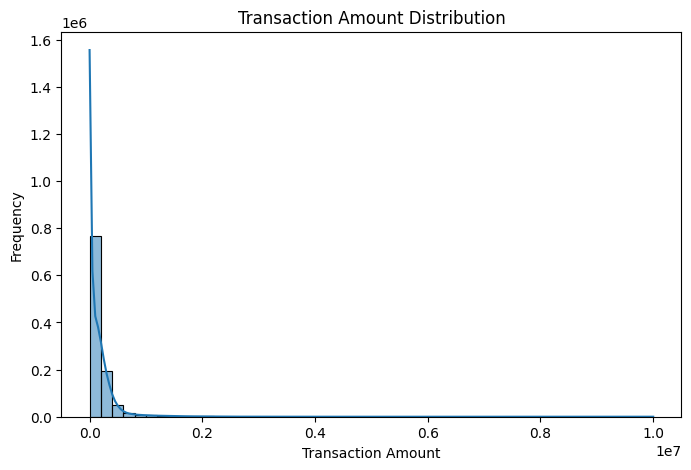

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()


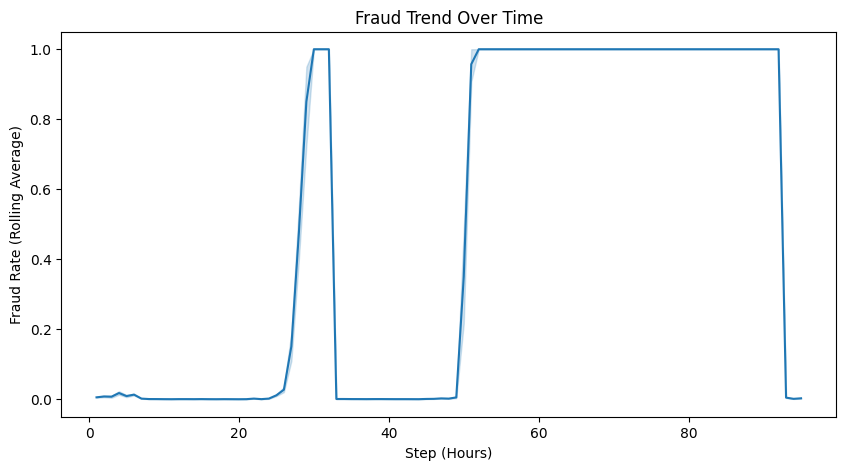

In [49]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df['step'], y=df['isFraud'].rolling(10).mean())
plt.title("Fraud Trend Over Time")
plt.xlabel("Step (Hours)")
plt.ylabel("Fraud Rate (Rolling Average)")
plt.show()


In [52]:
df_fraud_spike = df[(df['step'] >= 20) & (df['step'] <= 30) & (df['isFraud'] == 1)]
print(df_fraud_spike['type'].value_counts())  # Check fraud transaction types


type
1    48
4    46
Name: count, dtype: int64


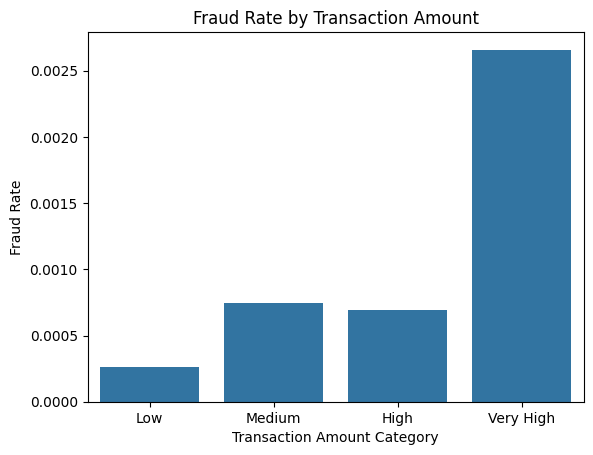

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

df['amount_category'] = pd.qcut(df['amount'], q=4, labels=["Low", "Medium", "High", "Very High"])
fraud_rate = df.groupby('amount_category')['isFraud'].mean()

sns.barplot(x=fraud_rate.index, y=fraud_rate.values)
plt.title("Fraud Rate by Transaction Amount")
plt.xlabel("Transaction Amount Category")
plt.ylabel("Fraud Rate")
plt.show()


isFraud
0    1047433
1       1142
Name: count, dtype: int64


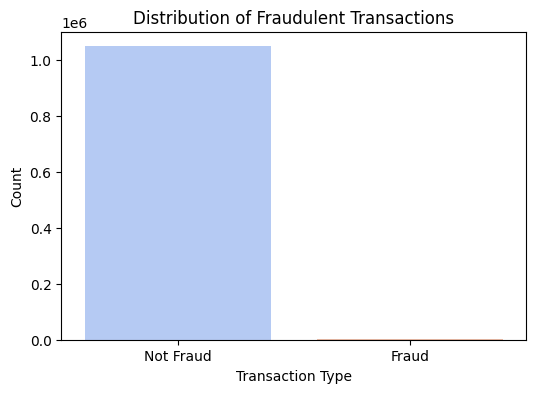

In [7]:
# Count fraud vs. non-fraud transactions
fraud_counts = df['isFraud'].value_counts()
print(fraud_counts)

plt.figure(figsize=(6, 4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette="coolwarm")
plt.xticks([0, 1], ["Not Fraud", "Fraud"])
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.title("Distribution of Fraudulent Transactions")
plt.show()

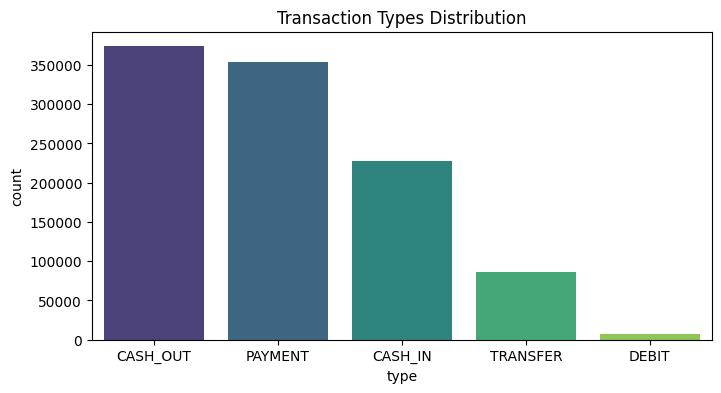

In [8]:
# Count transaction types
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="type", palette="viridis", order=df["type"].value_counts().index)
plt.title("Transaction Types Distribution")
plt.show()

In [9]:
# Fraud percentage per transaction type
fraud_by_type = df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
print(fraud_by_type)

type
TRANSFER    0.006501
CASH_OUT    0.001547
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64


In [10]:
df = df.drop(['nameOrig', 'nameDest'], axis=1)

In [11]:
# Convert 'type' to numerical values using Label Encoding
encoder = LabelEncoder()
df["type"] = encoder.fit_transform(df["type"])

In [12]:
# Downsample majority class (non-fraud transactions) to match the minority class
fraud = df[df["isFraud"] == 1]
non_fraud = df[df["isFraud"] == 0].sample(n=len(fraud), random_state=42)

# Combine fraud and non-fraud samples
balanced_df = pd.concat([fraud, non_fraud])

# Shuffle dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [13]:
X = balanced_df.drop("isFraud", axis=1)
y = balanced_df["isFraud"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9671772428884027
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       221
           1       0.97      0.97      0.97       236

    accuracy                           0.97       457
   macro avg       0.97      0.97      0.97       457
weighted avg       0.97      0.97      0.97       457



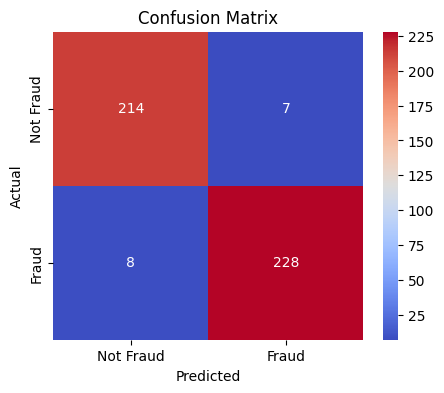

In [16]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [17]:
from sklearn.metrics import classification_report

y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities of being fraud
threshold = 0.3
y_pred_new = (y_probs > threshold).astype(int)

print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       221
           1       0.95      0.97      0.96       236

    accuracy                           0.96       457
   macro avg       0.96      0.96      0.96       457
weighted avg       0.96      0.96      0.96       457



In [18]:
import xgboost as xgb
from sklearn.metrics import classification_report
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       221
           1       0.98      0.98      0.98       236

    accuracy                           0.98       457
   macro avg       0.98      0.98      0.98       457
weighted avg       0.98      0.98      0.98       457



In [19]:
train_acc = xgb_model.score(X_train, y_train)
test_acc = xgb_model.score(X_test, y_test)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Training Accuracy: 1.0000
Test Accuracy: 0.9781


In [20]:
print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       221
           1       0.98      0.98      0.98       236

    accuracy                           0.98       457
   macro avg       0.98      0.98      0.98       457
weighted avg       0.98      0.98      0.98       457



In [21]:
from sklearn.metrics import accuracy_score

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

if train_acc > test_acc + 0.1:  # Threshold for overfitting
    print("Warning: Model is overfitting!")


Training Accuracy: 1.0000
Test Accuracy: 0.9672


In [22]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)

In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l2', C=0.1)  # L2 Regularization (Ridge)
model.fit(X_train, y_train)


LogisticRegression(C=0.1)

In [24]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=10)  # Keep top 10 features
X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)


In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_


In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=5)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=5)

In [28]:
from sklearn.metrics import classification_report

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.94      0.95       221
           1       0.94      0.96      0.95       236

    accuracy                           0.95       457
   macro avg       0.95      0.95      0.95       457
weighted avg       0.95      0.95      0.95       457



In [29]:
from sklearn.metrics import accuracy_score

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

if train_acc > test_acc + 0.1:  # Threshold for overfitting
    print("Warning: Model is overfitting!")

Training Accuracy: 0.9562
Test Accuracy: 0.9497


In [30]:
print(X.shape)  # Should match the number of rows in df (1048575)


(2284, 8)


In [32]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
predictions = iso_forest.fit_predict(X)

print(len(predictions))  # Should match df.shape[0]


2284


In [33]:
print("Original Dataset Shape:", df.shape)
print("Feature Matrix Shape:", X.shape)


Original Dataset Shape: (1048575, 9)
Feature Matrix Shape: (2284, 8)


In [34]:
X = X.reset_index(drop=True)
df = df.reset_index(drop=True)


In [35]:
X = df.select_dtypes(include=['number'])


In [36]:
X = X.fillna(0)


In [38]:
# Select numerical features only, excluding target variable
X = df.drop(columns=['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest'], errors='ignore')

# Check if X has the expected shape
print("Feature matrix shape:", X.shape)

# Train Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(X)


Feature matrix shape: (1048575, 7)


IsolationForest(contamination=0.01, random_state=42)

In [39]:
# Ensure X_test has the same columns as X_train
X_test = df.drop(columns=['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest'], errors='ignore')

# Predict anomalies
df['anomaly_score'] = iso_forest.predict(X_test)


In [40]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.01, random_state=42)
df['anomaly_score'] = iso_forest.fit_predict(X)

# Identify anomalies
df_anomalies = print(df[df['anomaly_score'] == -1])



         step  type      amount  oldbalanceOrg  newbalanceOrig  \
94          1     4  1724887.05           0.00            0.00   
358         1     4  1538200.39           0.00            0.00   
359         1     4  2421578.09           0.00            0.00   
362         1     4  1457213.54           0.00            0.00   
375         1     4  2545478.01           0.00            0.00   
...       ...   ...         ...            ...             ...   
1047904    95     1   257225.25           0.00            0.00   
1047974    95     4   166846.64       72723.00            0.00   
1048011    95     4  1339844.75           0.00            0.00   
1048082    95     4  2905341.96       41666.26            0.00   
1048561    95     2     7880.88       31489.00        23608.12   

         oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
94           3470595.10      19200000.0        0               0   
358          6977445.38      19200000.0        0               0   
359

isFraud
0    1047433
1       1142
Name: count, dtype: int64
type
0    0.000000
1    0.001547
2    0.000000
3    0.000000
4    0.006501
Name: isFraud, dtype: float64


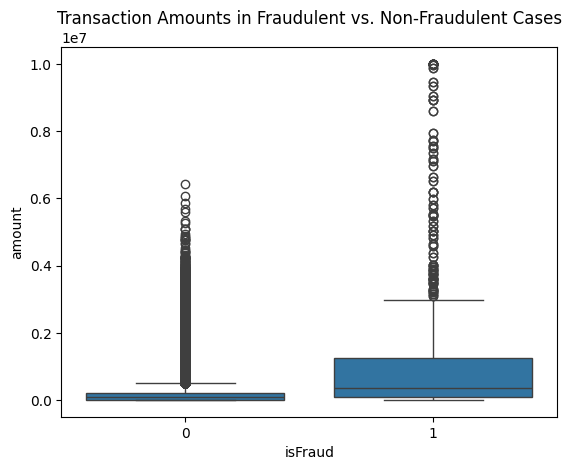

In [41]:
# Fraudulent transactions count
print(df['isFraud'].value_counts())

# Fraud rate per transaction type
fraud_by_type = df.groupby('type')['isFraud'].mean()
print(fraud_by_type)

# Compare fraud & non-fraud transactions
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title("Transaction Amounts in Fraudulent vs. Non-Fraudulent Cases")
plt.show()


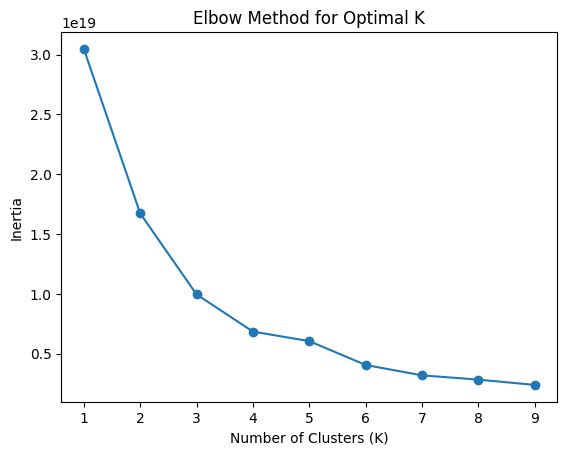

In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X_cluster = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]

inertia = []
K_range = range(1, 10)  # Trying K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [44]:
# Group by cluster and calculate summary statistics
cluster_summary = df.groupby('cluster').agg(
    count=('amount', 'count'),
    avg_amount=('amount', 'mean'),
    avg_oldbalanceOrg=('oldbalanceOrg', 'mean'),
    avg_newbalanceOrig=('newbalanceOrig', 'mean'),
    avg_oldbalanceDest=('oldbalanceDest', 'mean'),
    avg_newbalanceDest=('newbalanceDest', 'mean'),
    fraud_rate=('isFraud', 'mean')
).reset_index()

# Display the results
print(cluster_summary)


   cluster   count     avg_amount  avg_oldbalanceOrg  avg_newbalanceOrig  \
0        0  935160  132197.358743       2.986684e+05        3.125238e+05   
1        1   48117  157987.237852       1.236713e+07        1.252486e+07   
2        2   65298  538250.328298       6.446209e+05        6.479062e+05   

   avg_oldbalanceDest  avg_newbalanceDest  fraud_rate  
0        4.963547e+05        6.047831e+05    0.000971  
1        1.452802e+06        1.361741e+06    0.000000  
2        7.528541e+06        8.227330e+06    0.003584  


In [45]:
def assign_cluster_labels(cluster):
    if cluster == 0:
        return "Regular Transactions"
    elif cluster == 1:
        return "High-Value Safe Transactions"
    elif cluster == 2:
        return "Suspicious Transactions"
    else:
        return "Unknown"

df['cluster_label'] = df['cluster'].apply(assign_cluster_labels)


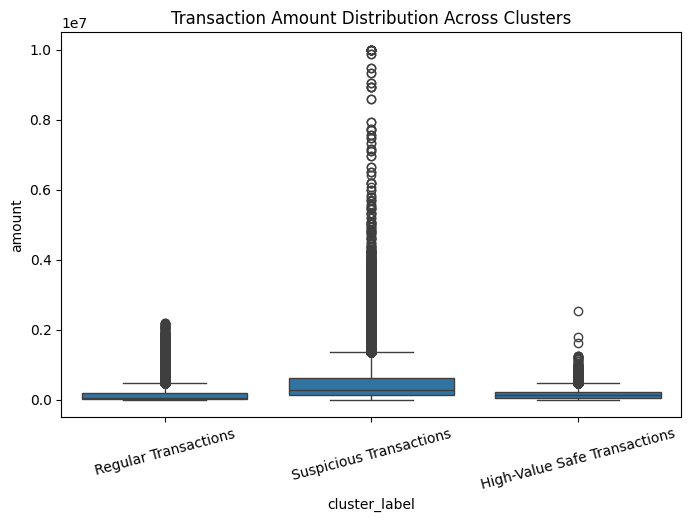

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['cluster_label'], y=df['amount'])
plt.title("Transaction Amount Distribution Across Clusters")
plt.xticks(rotation=15)
plt.show()


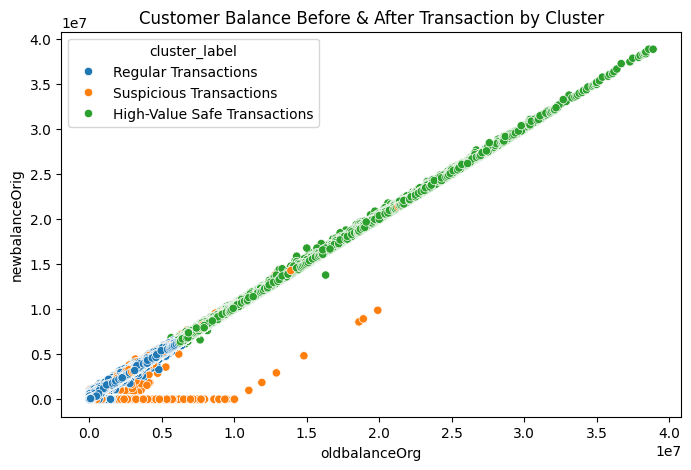

In [47]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['oldbalanceOrg'], y=df['newbalanceOrig'], hue=df['cluster_label'])
plt.title("Customer Balance Before & After Transaction by Cluster")
plt.show()

In [42]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select numerical features
X_cluster = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]

# Scale Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Check Clusters
print(df[['cluster', 'isFraud']].groupby('cluster').mean())  # Mean fraud rate per cluster


          isFraud
cluster          
0        0.000971
1        0.000000
2        0.003584
